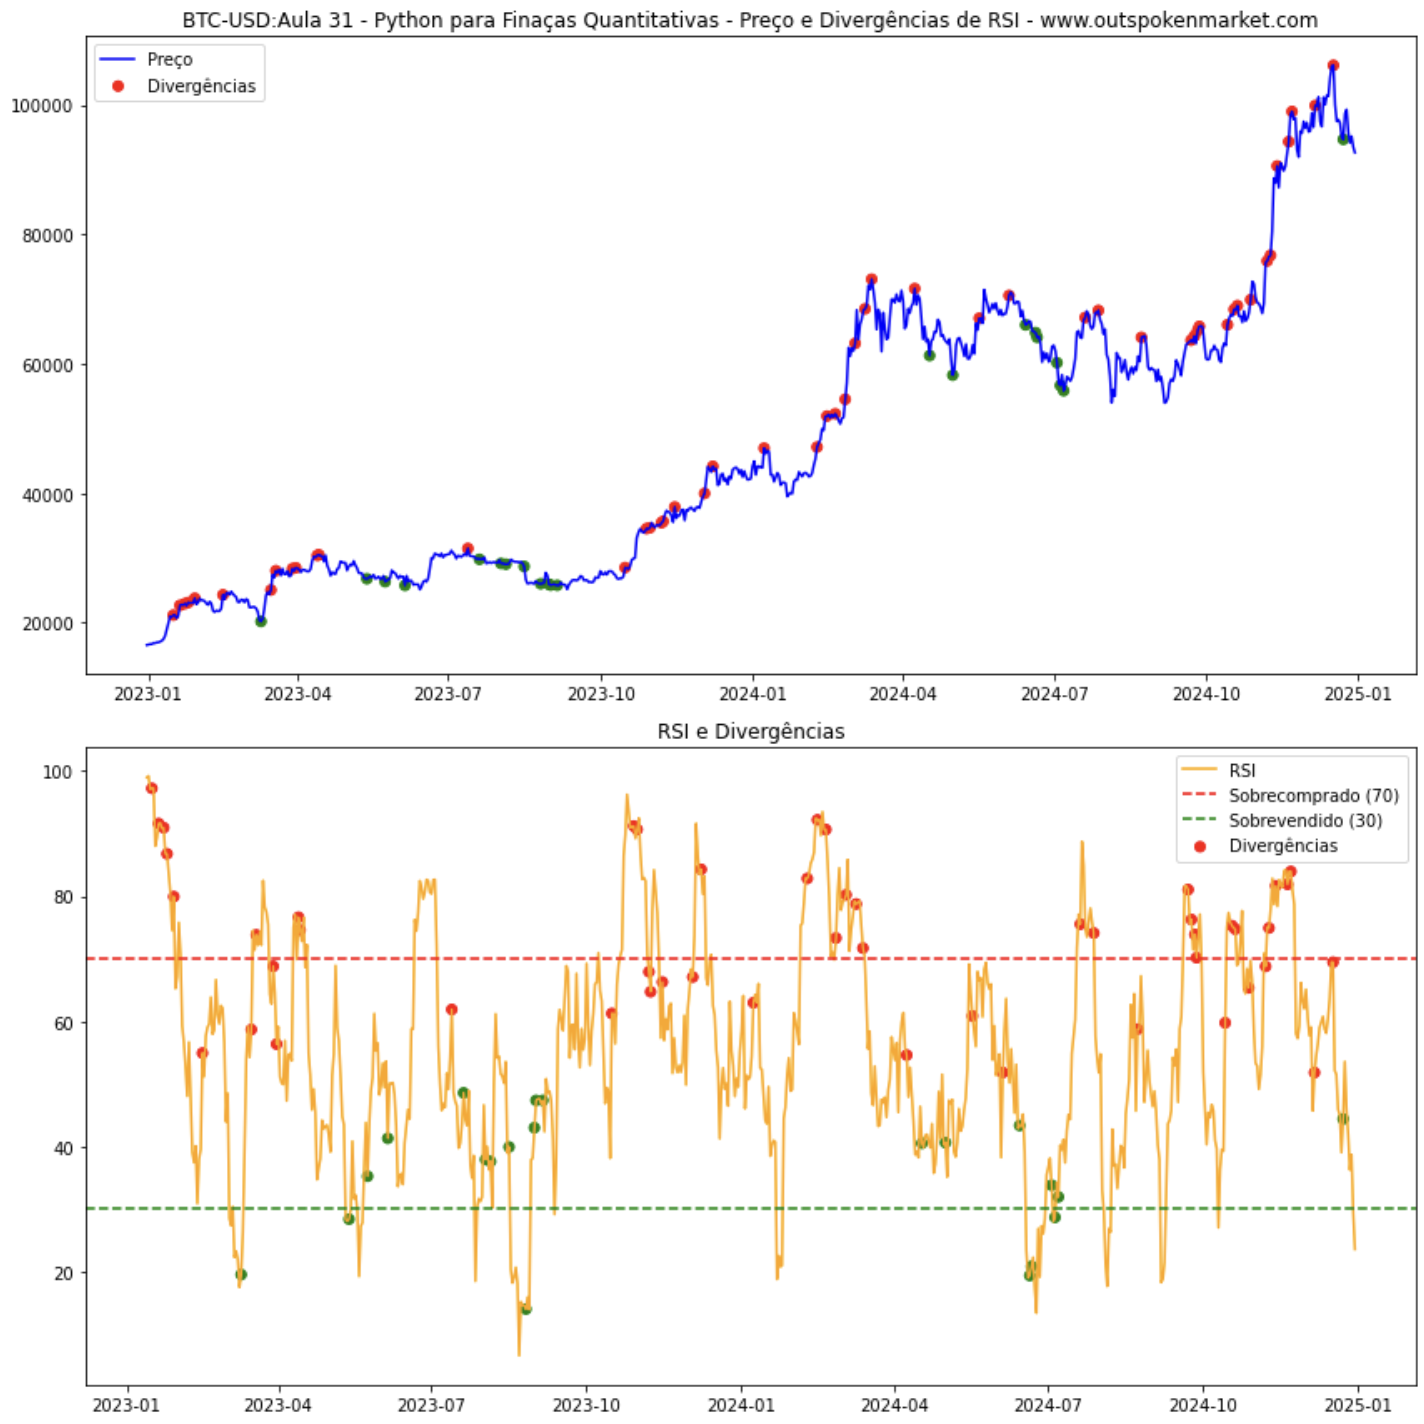

In [45]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [46]:
# Função para calcular o RSI
def calculate_rsi(data, window=14):
    """
    Calcula o Índice de Força Relativa (RSI).

    Parameters:
        data (pd.Series): Série de preços de fechamento.
        window (int): Janela para o cálculo do RSI.

    Returns:
        pd.Series: RSI calculado.
    """
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [47]:
# Função para identificar divergências
def detect_rsi_divergence(data, rsi, lookback=14):
    """
    Detecta divergências entre o preço e o RSI.

    Parameters:
        data (pd.Series): Série de preços de fechamento.
        rsi (pd.Series): RSI calculado.
        lookback (int): Número de períodos para verificar divergências.

    Returns:
        pd.DataFrame: DataFrame com divergências detectadas.
    """
    # Inicializa um dicionário para armazenar as divergências detectadas
    divergence = {'Date': [], 'Type': [], 'Price': [], 'RSI': []}

    # Itera sobre os dados a partir do índice definido pelo lookback, garantindo dados suficientes para análise
    for i in range(lookback, len(data)):
        # Calcula o preço máximo nos últimos `lookback` períodos
        price_max = data[i-lookback:i].max()

        # Calcula o preço mínimo nos últimos `lookback` períodos
        price_min = data[i-lookback:i].min()

        # Obtém o RSI correspondente ao preço máximo no período
        rsi_max = rsi[data[i-lookback:i].idxmax()]

        # Obtém o RSI correspondente ao preço mínimo no período
        rsi_min = rsi[data[i-lookback:i].idxmin()]

        # Detecta divergência de alta (Bullish):
        # O preço atinge um novo mínimo (abaixo do preço mínimo anterior),
        # mas o RSI está subindo (acima do RSI mínimo anterior)
        if data[i] < price_min and rsi[i] > rsi_min:
            divergence['Date'].append(data.index[i])  # Armazena a data da divergência
            divergence['Type'].append('Bullish')      # Marca como divergência de alta
            divergence['Price'].append(data[i])       # Armazena o preço na data da divergência
            divergence['RSI'].append(rsi[i])          # Armazena o RSI na data da divergência

        # Detecta divergência de baixa (Bearish):
        # O preço atinge um novo máximo (acima do preço máximo anterior),
        # mas o RSI está caindo (abaixo do RSI máximo anterior)
        if data[i] > price_max and rsi[i] < rsi_max:
            divergence['Date'].append(data.index[i])  # Armazena a data da divergência
            divergence['Type'].append('Bearish')      # Marca como divergência de baixa
            divergence['Price'].append(data[i])       # Armazena o preço na data da divergência
            divergence['RSI'].append(rsi[i])          # Armazena o RSI na data da divergência

    # Converte o dicionário de divergências em um DataFrame
    # As colunas são: 'Date' (data), 'Type' (tipo de divergência), 'Price' (preço) e 'RSI' (valor do RSI)
    return pd.DataFrame(divergence)

In [48]:
# Função para plotar o gráfico
def plot_rsi_divergence(data, rsi, divergences, symbol):
    """
    Plota o gráfico de preços e RSI com divergências identificadas.

    Parameters:
        data (pd.Series): Série de preços de fechamento.
        rsi (pd.Series): RSI calculado.
        divergences (pd.DataFrame): Divergências detectadas.
    """
    plt.figure(figsize=(12, 12))

    # Plotar os preços
    plt.subplot(2, 1, 1)
    plt.plot(data, label='Preço', color='blue')
    plt.scatter(divergences['Date'], divergences['Price'], 
                c=divergences['Type'].apply(lambda x: 'green' if x == 'Bullish' else 'red'),
                label='Divergências')
    plt.title(symbol + ':Aula 31 - Python para Finaças Quantitativas - Preço e Divergências de RSI - www.outspokenmarket.com')
    plt.legend()

    # Plotar o RSI
    plt.subplot(2, 1, 2)
    plt.plot(rsi, label='RSI', color='orange')
    plt.axhline(70, color='red', linestyle='--', label='Sobrecomprado (70)')
    plt.axhline(30, color='green', linestyle='--', label='Sobrevendido (30)')
    plt.scatter(divergences['Date'], divergences['RSI'], 
                c=divergences['Type'].apply(lambda x: 'green' if x == 'Bullish' else 'red'),
                label='Divergências')
    plt.title('RSI e Divergências')
    plt.legend()

    plt.tight_layout()
    plt.show()

Baixando dados de BRL=X de 2023-01-01 até 2024-12-31...
[*********************100%***********************]  1 of 1 completed
Detectando divergências de RSI...
Divergências encontradas:
         Date     Type   Price        RSI
34 2024-10-14  Bearish  5.6106  58.272251
35 2024-10-23  Bearish  5.6893  79.798925
36 2024-10-29  Bearish  5.7102  75.007066
37 2024-10-30  Bearish  5.7600  74.152644
38 2024-11-01  Bearish  5.7894  77.473825
39 2024-11-05  Bearish  5.7906  64.523766
40 2024-11-14  Bearish  5.8059  61.599804
41 2024-12-03  Bearish  6.0568  77.672184
42 2024-12-17  Bearish  6.1473  71.556245
43 2024-12-19  Bearish  6.2889  67.000516
Plotando os dados...


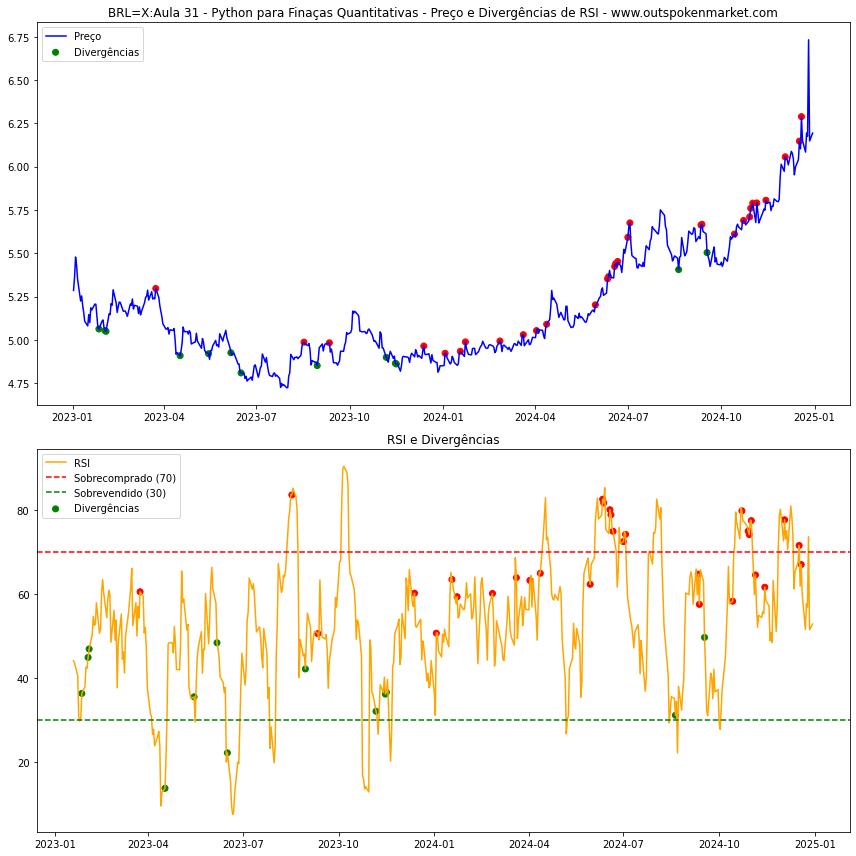

In [54]:
# Obter os dados históricos
symbol = 'BRL=X'
start_date = '2023-01-01'
end_date = '2024-12-31'

print(f"Baixando dados de {symbol} de {start_date} até {end_date}...")
data = yf.download(symbol, start=start_date, end=end_date)

# Calcular o RSI
data['RSI'] = calculate_rsi(data['Adj Close'], 14)

# Detectar divergências
print("Detectando divergências de RSI...")
divergences = detect_rsi_divergence(data['Adj Close'], data['RSI'], 14)

# Exibir as primeiras divergências
print("Divergências encontradas:")
print(divergences.tail(10))

# Plotar o gráfico
print("Plotando os dados...")
plot_rsi_divergence(data['Adj Close'], data['RSI'], divergences, symbol)